### Multiple Regression

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [7]:
import pandas as pd

# Read the data
ocean = pd.read_csv('ocean1.csv', index_col=0)

# Drop specified columns
columns_to_drop = ['Depthm', 'STheta', 'O2Sat', 'Oxy_µmol/Kg']
ocean = ocean.drop(columns=columns_to_drop)

# Convert selected columns to object type
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

# Check the updated DataFrame
ocean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   T_degC    2000 non-null   float64
 2   O2ml_L    2000 non-null   float64
 3   Year      2000 non-null   object 
 4   Month     2000 non-null   object 
 5   Bottom_D  2000 non-null   float64
 6   Wea       2000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 125.0+ KB


In [8]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_54921/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_54921/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_54921/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,T_degC,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,5.63,0.70,3935.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,9.25,2.08,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,8.72,1.75,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,8.50,1.20,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,7.81,0.70,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,8.03,1.45,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,7.58,1.12,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,6.95,0.72,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,6.03,0.40,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

In [10]:
# Add a constant term to the independent variables
x = sm.add_constant(x)

# Fit the multiple regression model
model = sm.OLS(y, x).fit()

# Display the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     550.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:43:05   Log-Likelihood:                 3259.0
No. Observations:                2000   AIC:                            -6466.
Df Residuals:                    1974   BIC:                            -6320.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2666      0.014   2520.664      0.0

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.regression import linear_model

# Assuming 'model' is your fitted regression model
inf = model.get_influence()
C, _ = inf.cooks_distance

# Set a threshold for Cook's distance
threshold = 4 / len(y)

# Identify outliers based on Cook's distance
outliers = np.where(C > threshold)[0]

# Print the indices of outliers identified by Cook's distance
print("Indices of outliers identified by Cook's distance:")
print(np.where(C > threshold)[0])


Indices of outliers identified by Cook's distance:
[  59   64  278  361  362  431  432  439  521  640  814  815 1050 1215
 1232 1294 1315 1316 1317 1320 1321 1338 1339 1340 1341 1342 1406 1475
 1476 1477 1489 1548 1580 1581 1583 1595 1600 1621 1660 1764 1874 1926
 1927 1929 1935 1936 1939 1949 1955 1959 1960 1969 1977 1978 1979 1982
 1984 1985 1986 1992 1993 1994]


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


In [12]:
dummies

,Salnty,T_degC,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,5.63,0.70,3935.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,9.25,2.08,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,8.72,1.75,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,8.50,1.20,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,7.81,0.70,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,8.03,1.45,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,7.58,1.12,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,6.95,0.72,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,6.03,0.40,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
dummies_nooutlier = dummies.reset_index(drop=True)

In [9]:
subset_indices = [ 59, 64, 278, 361, 362, 431, 432, 439, 521, 640, 814, 815, 1050, 1215,
                   1232, 1294, 1315, 1316, 1317, 1320, 1321, 1338, 1339, 1340, 1341, 1342,
                   1406, 1475, 1476, 1477, 1489, 1548, 1580, 1581, 1583, 1595, 1600, 1621,
                   1660, 1764, 1874, 1926, 1927, 1929, 1935, 1936, 1939, 1949, 1955, 1959,
                   1960, 1969, 1977, 1978, 1979, 1982, 1984, 1985, 1986, 1992, 1993, 1994]

In [10]:
dummies_nooutlier = dummies_nooutlier.drop(subset_indices)


In [11]:

dummies_nooutlier

,Salnty,T_degC,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
0,34.155,5.63,0.70,3935.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,34.148,9.25,2.08,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,34.184,8.72,1.75,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,34.259,8.50,1.20,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,34.301,7.81,0.70,635.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,34.108,8.03,1.45,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1996,34.166,7.58,1.12,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1997,34.191,6.95,0.72,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1998,34.255,6.03,0.40,1339.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
x = dummies_nooutlier.iloc[:, 1:]
y = dummies_nooutlier.iloc[:, :1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [34.15808897]
Coefficients: 
 [[ 3.00202231e-02 -1.47232053e-01 -6.54429404e-06 -6.92558544e-03
  -1.32037961e-02 -3.25199141e-03  3.12250226e-16  1.37022086e-02
  -3.96778491e-02 -3.58435275e-02 -1.69956397e-01  7.31246695e-03
   1.51690249e-02  2.36650929e-03  1.39925401e-02  4.27369717e-03
   2.42861287e-17  3.30794465e-02  9.09925669e-03 -7.25534885e-03
  -2.22618267e-03 -1.99414155e-03 -1.69614872e-02  2.20620193e-04
   6.29848779e-03]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1006.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:10:13   Log-Likelihood:                 3961.8
No. Observations:                1938   AIC:                       

In [14]:
y_pred = mlr.predict(x_test)
x = dummies_nooutlier.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.35
Mean Absolute Error: 0.02304176750441705
Mean Square Error: 0.0009470409608674941
Root Mean Square Error: 0.03077403062433477


In [15]:
# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Model performance on training set
y_train_pred = mlr.predict(x_train)
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, y_train_pred)
train_meanSqErr = metrics.mean_squared_error(y_train, y_train_pred)
train_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Square Error:', train_meanSqErr)
print('Root Mean Square Error:', train_rootMeanSqErr)

# Model performance on testing set
y_test_pred = mlr.predict(x_test)
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
test_meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
test_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Square Error:', test_meanSqErr)
print('Root Mean Square Error:', test_rootMeanSqErr)


Training Set Performance:
R squared: 92.62
Mean Absolute Error: 0.023322959871057727
Mean Square Error: 0.0009915573508952414
Root Mean Square Error: 0.03148900365040535

Testing Set Performance:
R squared: 90.95
Mean Absolute Error: 0.02304176750441705
Mean Square Error: 0.0009470409608674941
Root Mean Square Error: 0.03077403062433477


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features (x) and target variable (y)
x = dummies_nooutlier.iloc[:, 1:]
y = dummies_nooutlier.iloc[:, :1]
# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 92.61
Mean Absolute Error: 0.023267599343786857
Mean Squared Error: 0.0009812008549857547
Root Mean Squared Error: 0.03132412576570581

Testing Set Performance:
R squared: 91.26
Mean Absolute Error: 0.023608879965779997
Mean Squared Error: 0.0009688405555535903
Root Mean Squared Error: 0.03112620368039749

Cross-Validation Scores:
R squared scores: [0.91929431 0.92070971 0.92194711 0.92810656 0.91808152]
Average R squared: 92.16
Mean Squared Error scores: [0.00108538 0.0010248  0.00092742 0.00106759 0.00103155]
Average Mean Squared Error: 0.0010


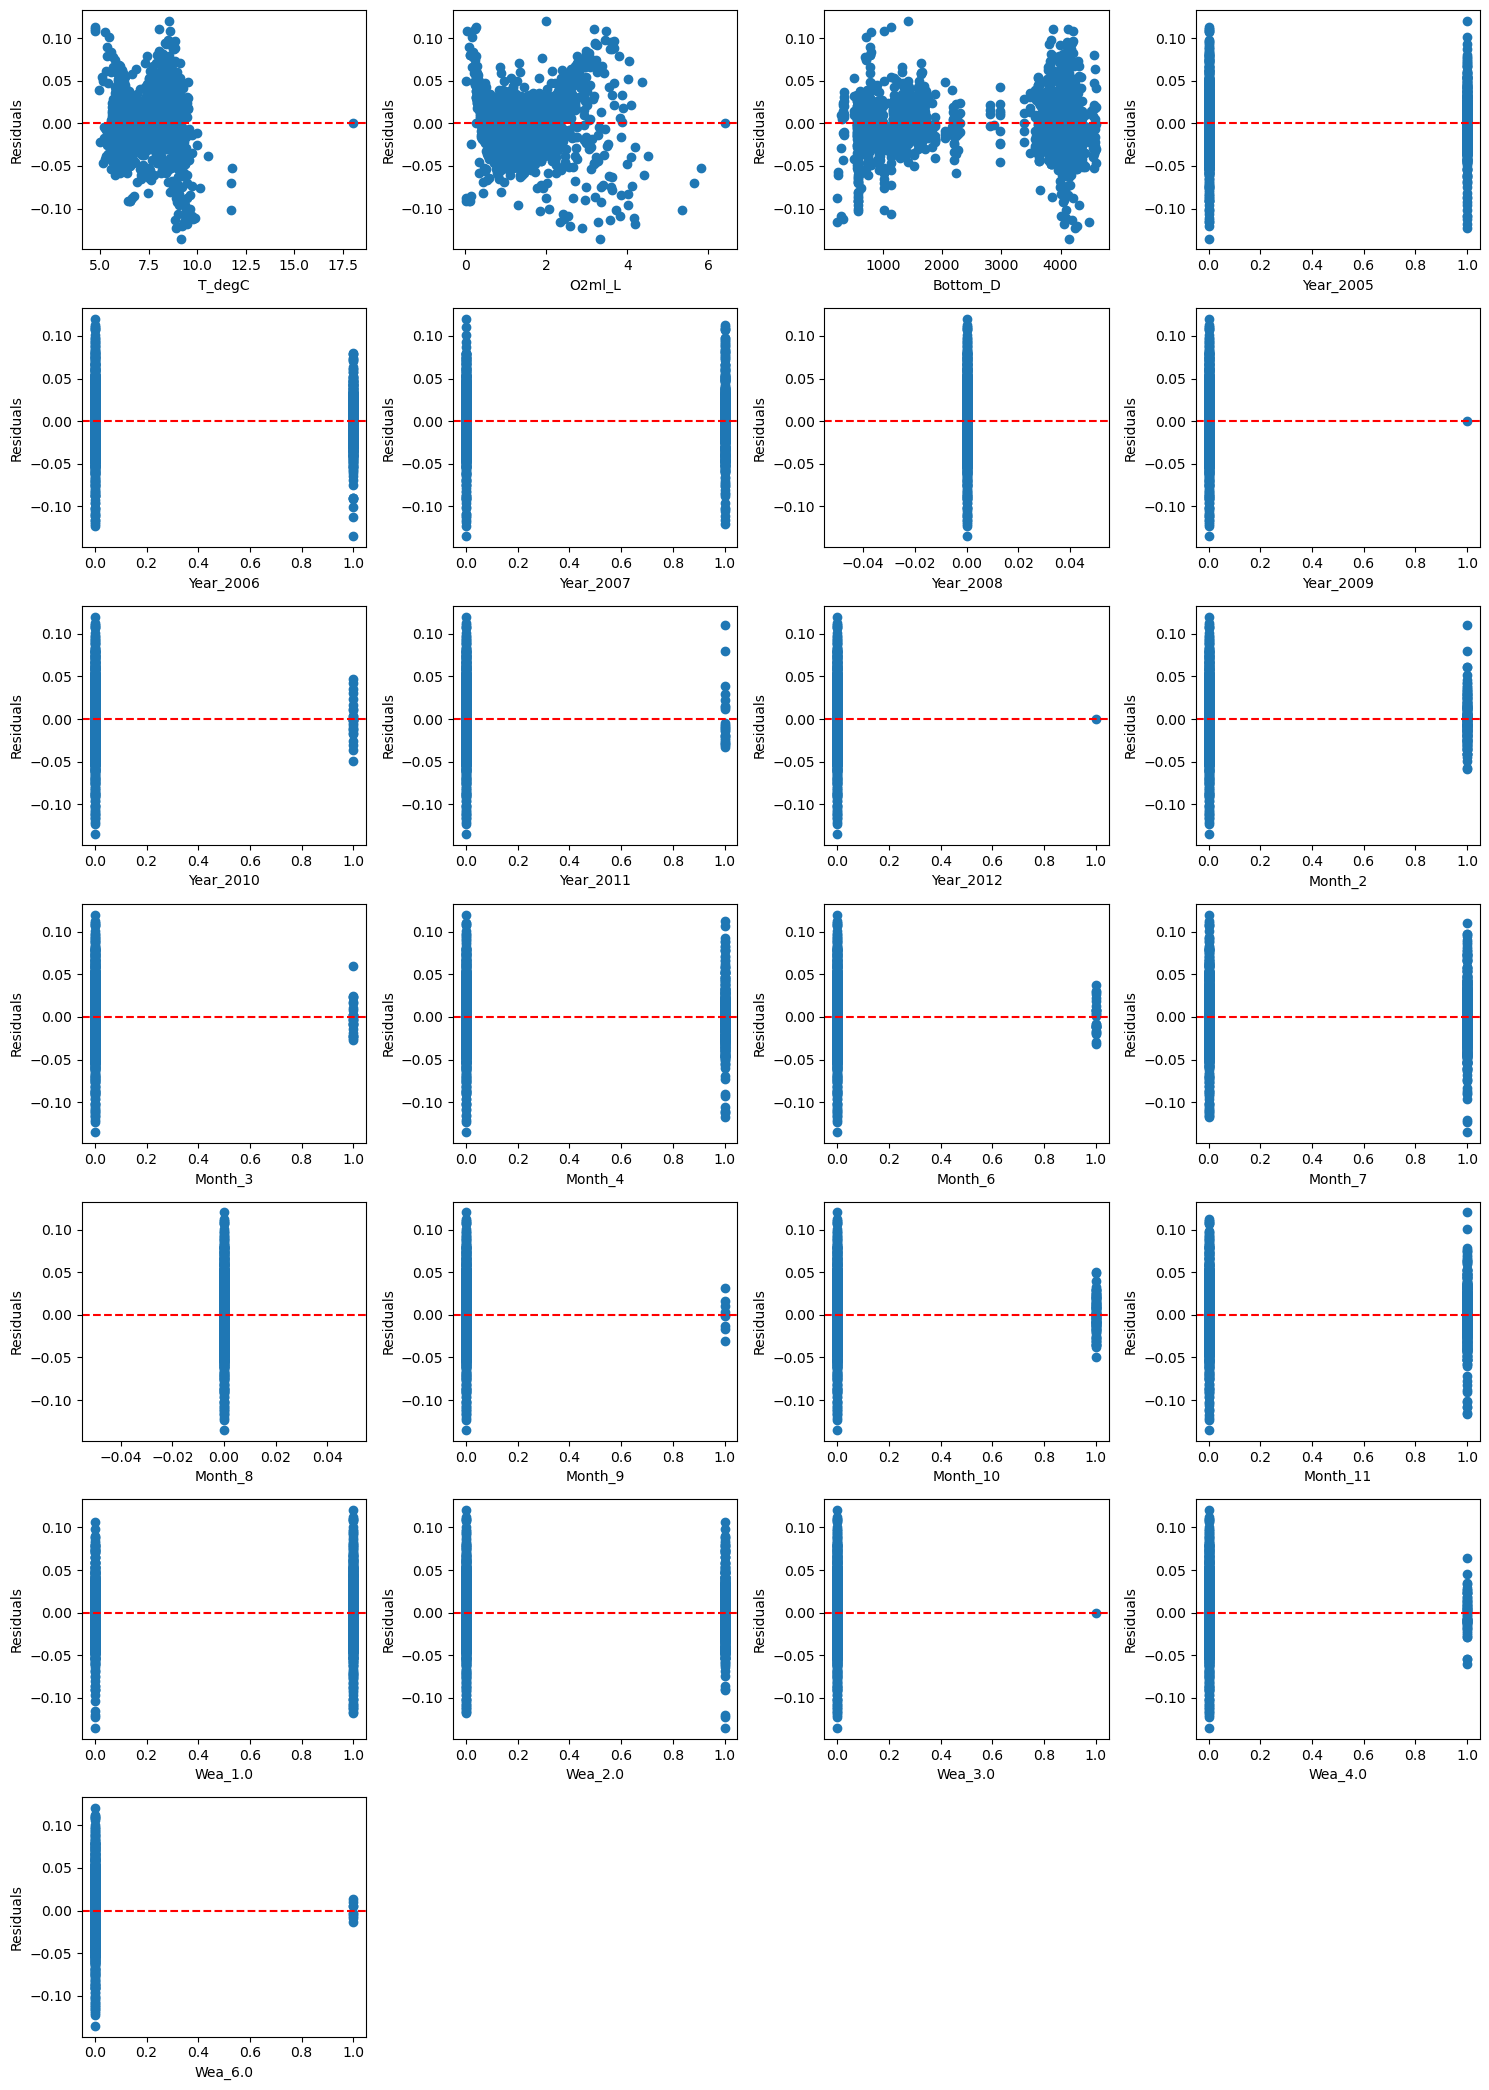

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


residuals = model.resid


predictors = x  # Use all the predictor variables



num_predictors = len(predictors.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))


for i, col in enumerate(predictors.columns):
    ax = axes.flatten()[i]
    ax.scatter(predictors[col], residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.axhline(0, color='red', linestyle='--')


for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


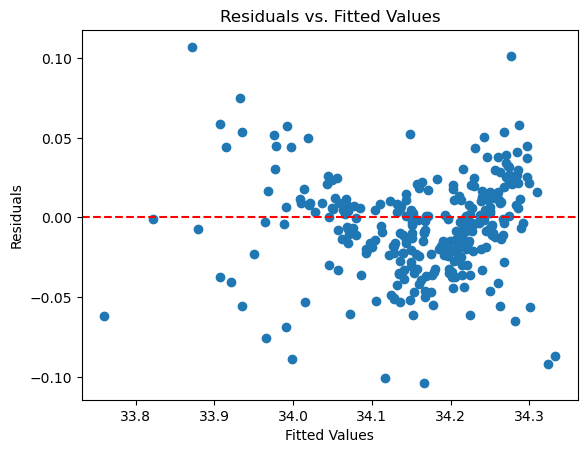

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Assuming you have already defined 'model' and 'x' (features)

# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = residuals = y_test - y_pred


# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

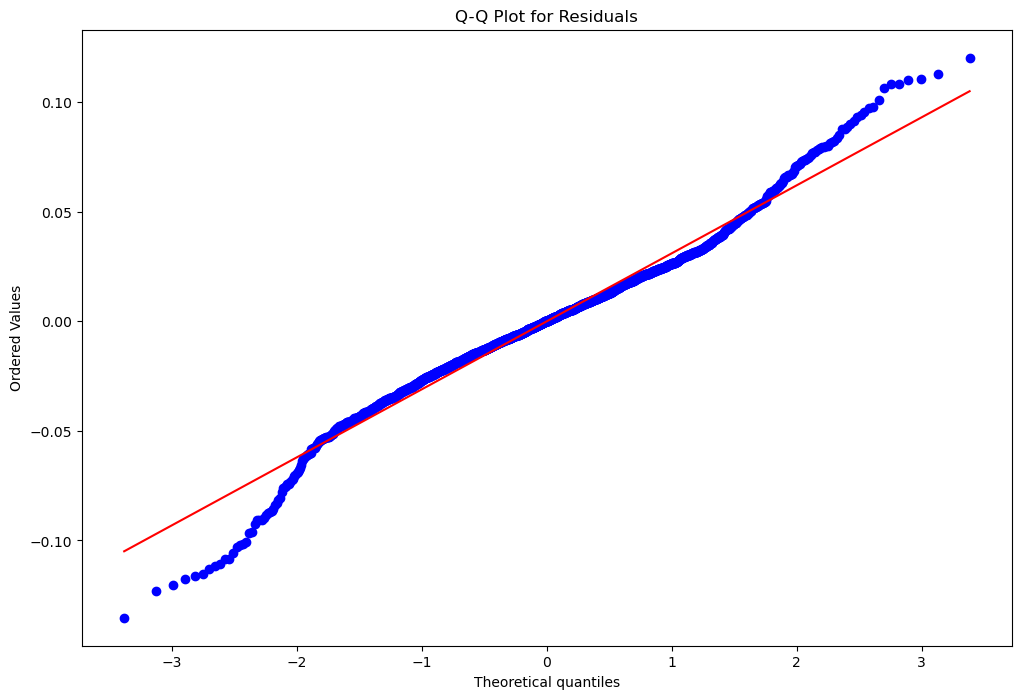

In [110]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


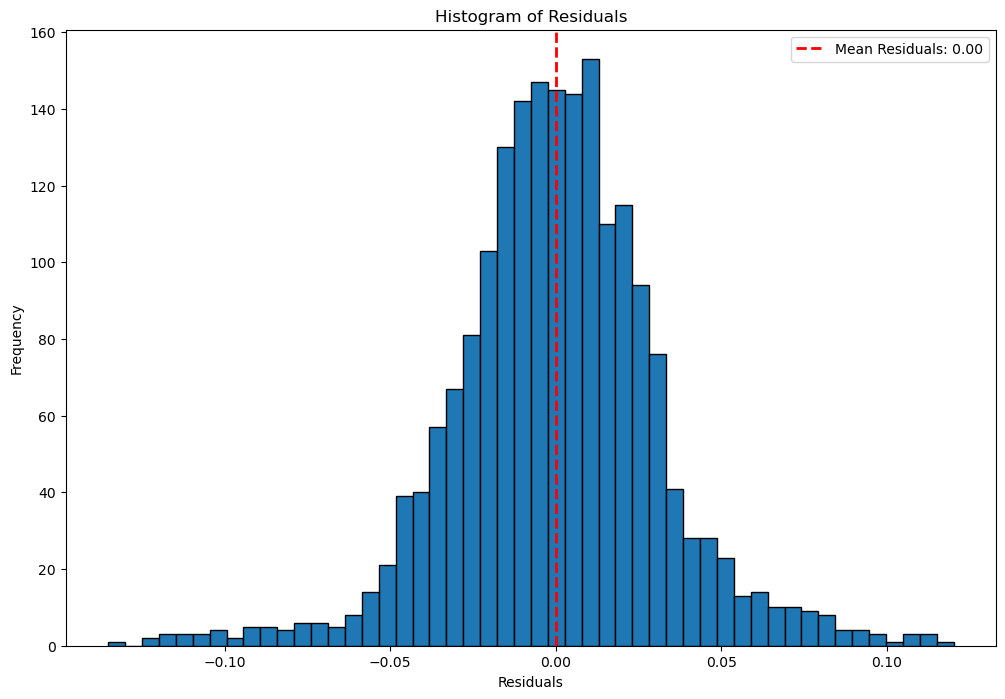

In [111]:
import matplotlib.pyplot as plt

# Assuming 'model' is your linear regression model
residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()


In [112]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable         VIF
0       const  178.481112
1      T_degC    3.802733
2      O2ml_L    4.056390
3    Bottom_D    1.873308
4   Year_2005    3.196441
5   Year_2006    3.937099
6   Year_2007    3.365257
7   Year_2008         NaN
8   Year_2009    1.071519
9   Year_2010    1.865787
10  Year_2011    1.302838
11  Year_2012    1.088807
12    Month_2    2.324498
13    Month_3    1.185332
14    Month_4    2.214538
15    Month_6    1.200916
16    Month_7    2.703294
17    Month_8         NaN
18    Month_9    1.593498
19   Month_10    1.739942
20   Month_11    2.374033
21    Wea_1.0    2.569563
22    Wea_2.0    2.690362
23    Wea_3.0    1.011989
24    Wea_4.0    1.285441
25    Wea_6.0    1.052723


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
